1\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and stardand deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

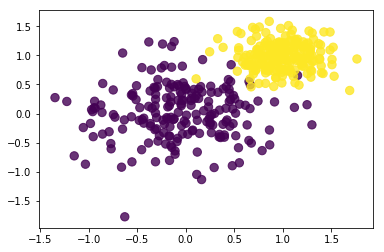

In [1]:
from IPython.display import Image
Image('two_categories_scatter_plot.png')

First mean and std dev. result 0.09884274275188028 0.24578987848022651
Second mean and std dev. result 0.14845556149681532 0.28851278936282787


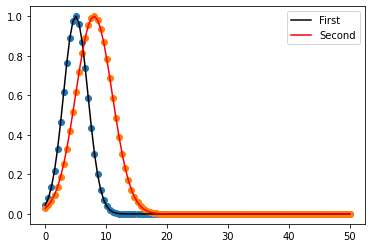

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def func(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))
x = np.linspace(0,50,100)
y = func(x, 1, 5, 2)
yn = func(x,1,8,3)
print("First mean and std dev. result",y.mean(),y.std())
print("Second mean and std dev. result",yn.mean(),yn.std())
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, c='k', label='First')
ax.scatter(x, y)
ax.plot(x, yn, c='r', label='Second')
ax.scatter(x, yn)
ax.legend()


2\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn jointplot of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

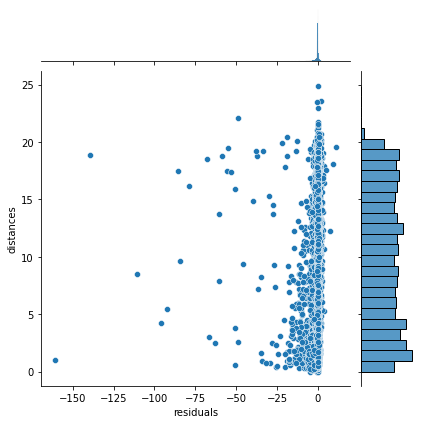

In [65]:
import pandas as pd
import seaborn as sns
#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl
data=pd.read_pickle(r'residuals_261.pkl')#inspect dataset
a=data.tolist()#convert to a list
df=pd.DataFrame(a,columns = ['residuals','distances'])#convert to df
df2=df[df['residuals']<2]#selecting variables of residuals smaller than 2
sns.jointplot(x=df['residuals'],y=df['distances'])


3\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.
